In [ ]:
# Setp 2. Importing Libraries
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from datetime import datetime as dt
import seaborn as sns

In [ ]:
# Importing data
df = pd.read_csv('merged_citibike_weather.csv', index_col = 0)

In [4]:
df.dtypes

end_lng               float64
end_station_id         object
end_station_name       object
ended_at               object
member_casual          object
ride_id                object
rideable_type          object
start_lat             float64
start_lng             float64
start_station_id       object
start_station_name     object
started_at             object
start_station_type     object
end_station_type       object
date                   object
PRCP                  float64
TAVG                  float64
TMAX                  float64
TMIN                  float64
dtype: object

In [ ]:
# Consistenci Checks

df.head()

,end_lng,end_station_id,end_station_name,ended_at,member_casual,ride_id,rideable_type,start_lat,start_lng,start_station_id,start_station_name,started_at,start_station_type,end_station_type,date,PRCP,TAVG,TMAX,TMIN
end_lat,,,,,,,,,,,,,,,,,,,
40.736982,-74.027781,HB103,south waterfront walkway - sinatra dr & 1 st,2022-03-18 15:45:34,casual,3255D3E3F33CDC45,classic_bike,40.743140,-74.040041,HB404,mama johnson field - 4 st & jackson st,2022-03-18 15:38:17,both,both,2022-03-18,0.0,13.9,22.8,9.4
40.719586,-74.043117,JC005,grove st path,2022-03-04 16:50:45,member,17FA5604A37338F9,electric_bike,40.723659,-74.064194,JC020,baldwin at montgomery,2022-03-04 16:44:48,both,both,2022-03-04,0.0,-1.9,3.3,-5.5
40.719586,-74.043117,JC005,grove st path,2022-03-13 17:54:44,member,7DEC9ADDB8D6BBE1,electric_bike,40.723659,-74.064194,JC020,baldwin at montgomery,2022-03-13 17:44:32,both,both,2022-03-13,0.0,-2.3,1.7,-4.9
40.719586,-74.043117,JC005,grove st path,2022-03-13 15:41:22,member,9D69F74EEF231A2E,classic_bike,40.723659,-74.064194,JC020,baldwin at montgomery,2022-03-13 15:33:47,both,both,2022-03-13,0.0,-2.3,1.7,-4.9
40.719586,-74.043117,JC005,grove st path,2022-03-11 12:33:24,member,C84AE4A9D78A6347,classic_bike,40.723659,-74.064194,JC020,baldwin at montgomery,2022-03-11 12:21:18,both,both,2022-03-11,0.0,7.2,11.7,2.2


In [8]:
# Getting column names
print(df.columns)

Index(['end_lng', 'end_station_id', 'end_station_name', 'ended_at',
       'member_casual', 'ride_id', 'rideable_type', 'start_lat', 'start_lng',
       'start_station_id', 'start_station_name', 'started_at',
       'start_station_type', 'end_station_type', 'date', 'PRCP', 'TAVG',
       'TMAX', 'TMIN'],
      dtype='object')


In [9]:
# Preparing Data for visualizations
# Convert datetime columns
df['started_at'] = pd.to_datetime(df['started_at'])
df['ended_at'] = pd.to_datetime(df['ended_at'])
df['date'] = pd.to_datetime(df['date'])


In [10]:
# trip duration in minutes
df['trip_duration'] = (df['ended_at'] - df['started_at']).dt.total_seconds() / 60

In [11]:
# Extracting additional time features
df['hour'] = df['started_at'].dt.hour
df['weekday'] = df['started_at'].dt.day_name()
df['month'] = df['started_at'].dt.month

In [12]:
# Daily trip counts for trend plots
daily_trips = df.groupby('date').size().reset_index(name='trip_count')

In [15]:
# Checking new column names
print(df.columns)

Index(['end_lng', 'end_station_id', 'end_station_name', 'ended_at',
       'member_casual', 'ride_id', 'rideable_type', 'start_lat', 'start_lng',
       'start_station_id', 'start_station_name', 'started_at',
       'start_station_type', 'end_station_type', 'date', 'PRCP', 'TAVG',
       'TMAX', 'TMIN', 'trip_duration', 'hour', 'weekday', 'month'],
      dtype='object')


In [14]:
##columns are ready for analysis:
#trip_duration : numeric, for box plots.
#hour, weekday, month :  for time-based plots ( hourly patterns, seasonal analysis).
#trip_count (daily aggregated) : for dual-axis line plot with weather.
#start_station_name : for top  stations bar chart.

In [ ]:
# Step 3. Settinf the theme for all plots
sns.set_theme(style="whitegrid", palette="Set2")

/var/folders/n5/lt6zjw5j12s3tv1t42m14nqh0000gn/T/ipykernel_8569/1407341983.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_stations.index, y=top_stations.values, palette="Set2")


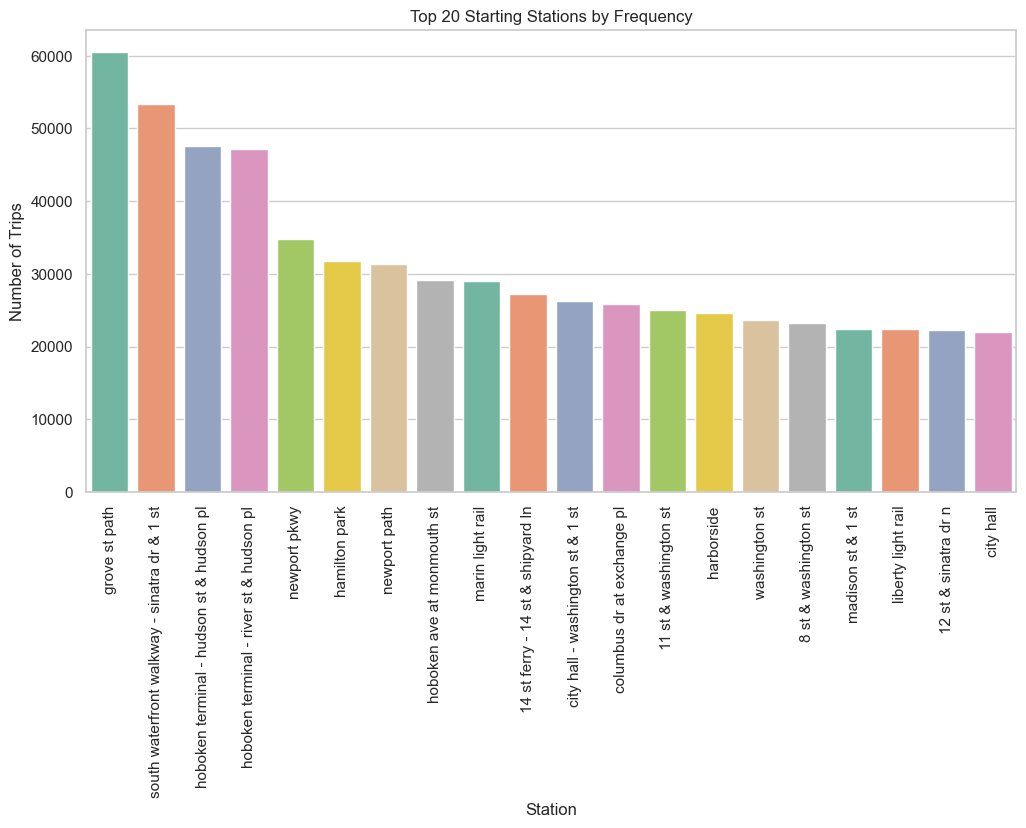

In [16]:
# Step 4. Creating a Bar Chart of the top 20 starting stations frequencies.
top_stations = df['start_station_name'].value_counts().head(20)

plt.figure(figsize=(12,6))
sns.barplot(x=top_stations.index, y=top_stations.values, palette="Set2")
plt.xticks(rotation=90)
plt.title("Top 20 Starting Stations by Frequency")
plt.ylabel("Number of Trips")
plt.xlabel("Station")
plt.show()

In [ ]:
# Just in case I want to change colors because they repeat too much
sns.barplot(x=top_stations.index, y=top_stations.values, palette="tab20")

In [ ]:
# Step 5. Recreating dual Axis line plot from previous exercise using seaborn ( Trips vs Temperature)
# Creating Daily aggregation with trip counts.
daily_trips = df.groupby('date').size().reset_index(name='trip_count')
daily = daily_trips.merge(df[['date','TAVG']].drop_duplicates(), on='date', how='left')

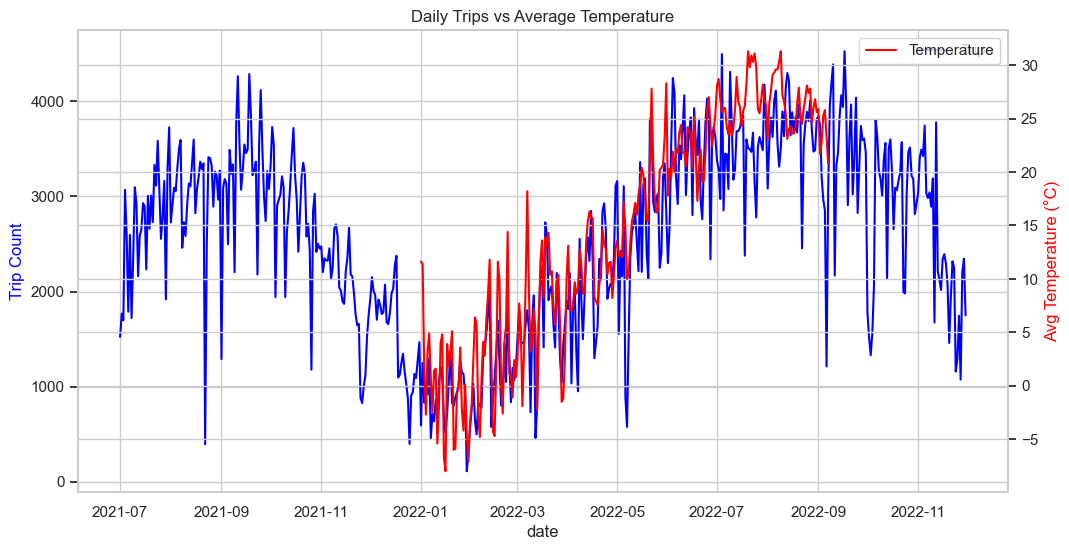

In [18]:
# Plotting
fig, ax1 = plt.subplots(figsize=(12,6))

sns.lineplot(data=daily, x="date", y="trip_count", ax=ax1, color="blue", label="Trips")
ax1.set_ylabel("Trip Count", color="blue")

ax2 = ax1.twinx()
sns.lineplot(data=daily, x="date", y="TAVG", ax=ax2, color="red", label="Temperature")
ax2.set_ylabel("Avg Temperature (°C)", color="red")

plt.title("Daily Trips vs Average Temperature")
plt.show()

In [22]:
# Still data from 2021, need to create a df for only 2022

df_2022 = df[df['started_at'].dt.year == 2022].copy()

# quick check
print(df_2022['started_at'].min(), " → ", df_2022['started_at'].max())
print("Total trips in 2022:", len(df_2022))

2022-01-01 00:10:20  →  2022-11-30 23:57:41
Total trips in 2022: 846900


/var/folders/n5/lt6zjw5j12s3tv1t42m14nqh0000gn/T/ipykernel_8569/3765421892.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_stations.index, y=top_stations.values, palette="Set2")


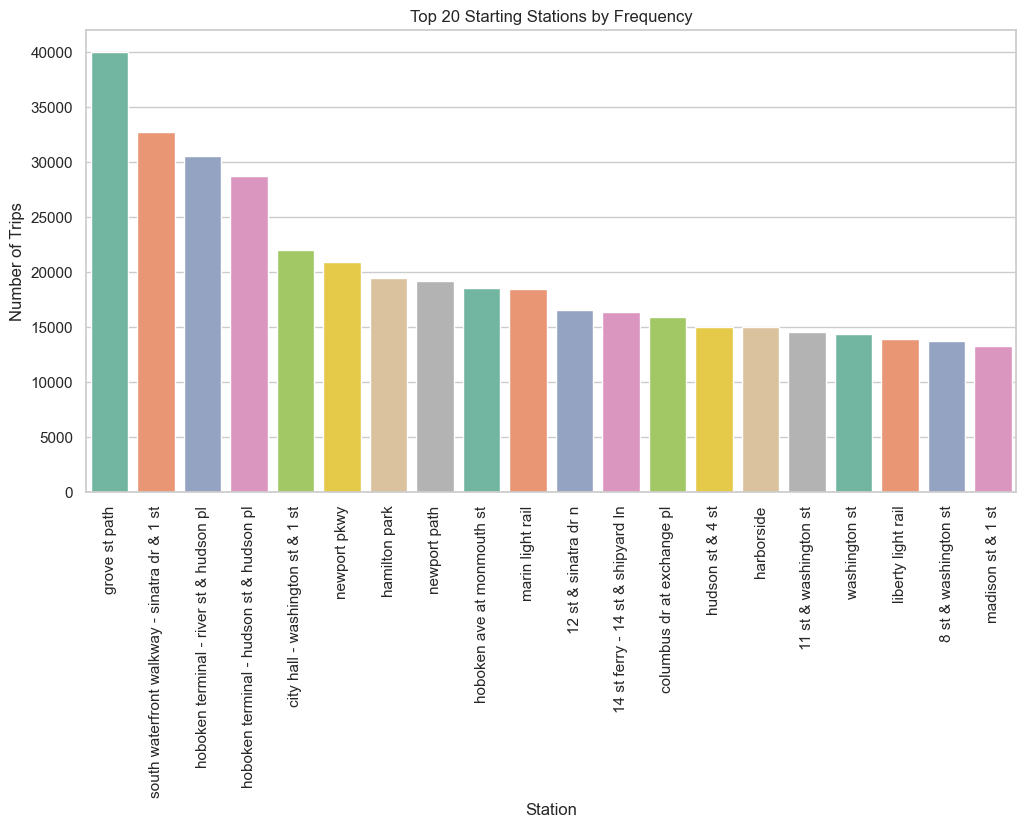

/var/folders/n5/lt6zjw5j12s3tv1t42m14nqh0000gn/T/ipykernel_8569/3765421892.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_stations.index, y=top_stations.values, palette="Set2")


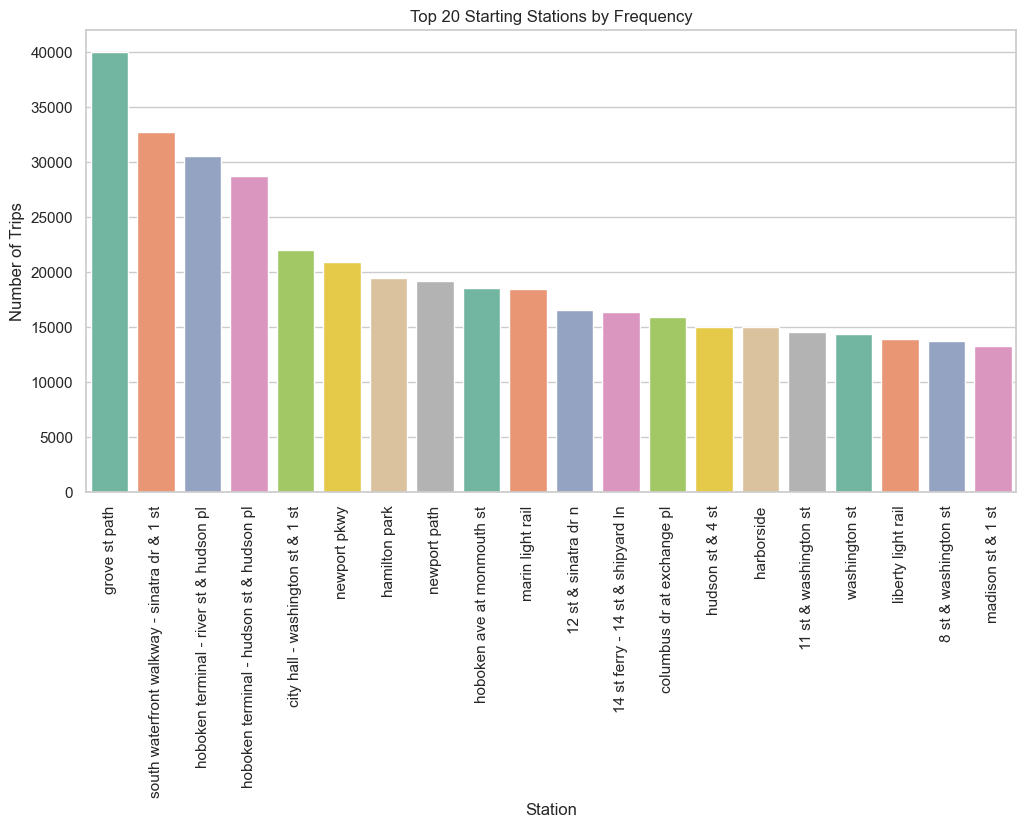

In [23]:
# Step 4.  Second attempt : Creating a Bar Chart of the top 20 starting stations frequencies.
top_stations = df_2022['start_station_name'].value_counts().head(20)

plt.figure(figsize=(12,6))
sns.barplot(x=top_stations.index, y=top_stations.values, palette="Set2")
plt.xticks(rotation=90)
plt.title("Top 20 Starting Stations by Frequency")
plt.ylabel("Number of Trips")
plt.xlabel("Station")
plt.show()

plt.figure(figsize=(12,6))
sns.barplot(x=top_stations.index, y=top_stations.values, palette="Set2")
plt.xticks(rotation=90)
plt.title("Top 20 Starting Stations by Frequency")
plt.ylabel("Number of Trips")
plt.xlabel("Station")
plt.show()

In [ ]:
# Step 5.  2nd attempt : Recreating dual Axis line plot from previous exercise using seaborn ( Trips vs Temperature)
# Creating Daily aggregation with trip counts for df 2022
daily_trips = df_2022.groupby('date').size().reset_index(name='trip_count')
daily = daily_trips.merge(df_2022[['date','TAVG']].drop_duplicates(), on='date', how='left')

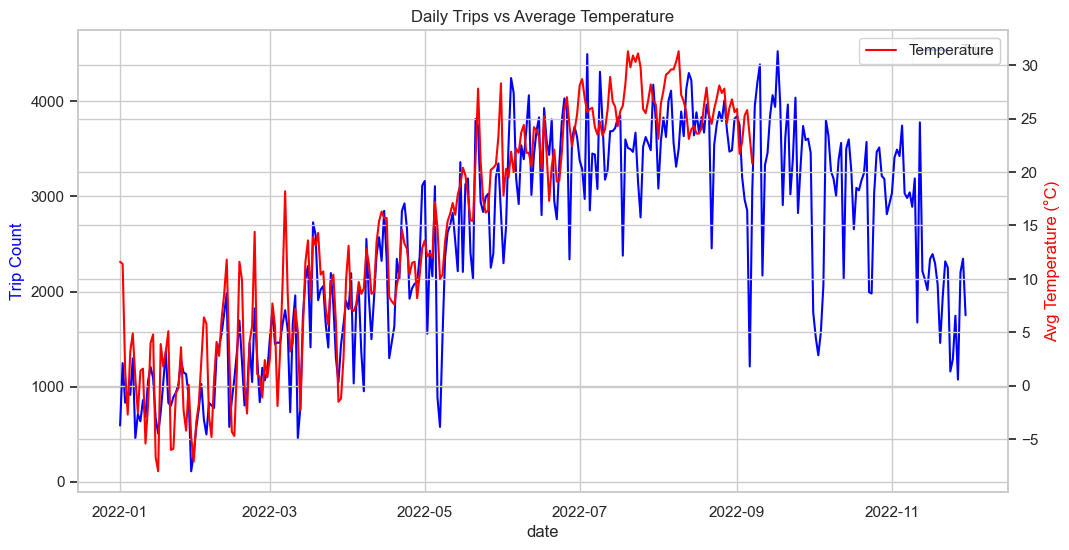

In [25]:
# Plotting
fig, ax1 = plt.subplots(figsize=(12,6))

sns.lineplot(data=daily, x="date", y="trip_count", ax=ax1, color="blue", label="Trips")
ax1.set_ylabel("Trip Count", color="blue")

ax2 = ax1.twinx()
sns.lineplot(data=daily, x="date", y="TAVG", ax=ax2, color="red", label="Temperature")
ax2.set_ylabel("Avg Temperature (°C)", color="red")

plt.title("Daily Trips vs Average Temperature")
plt.show()

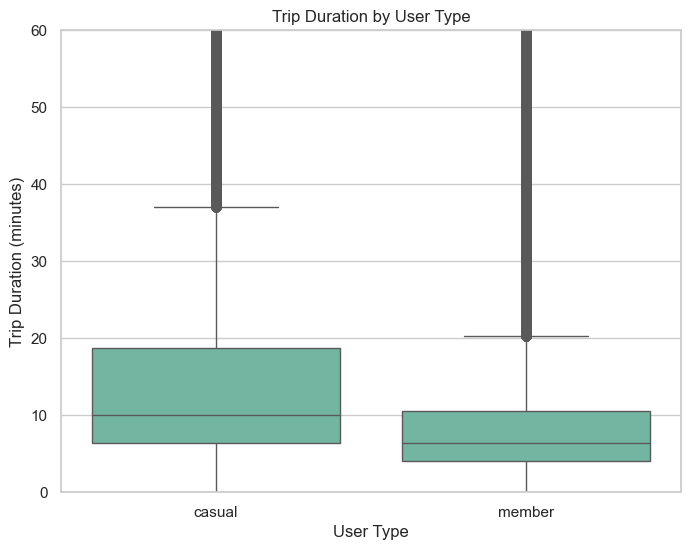

In [ ]:
# Step 6.  Making a Box plot of one of the categoricak variables in the dataset. Trip duration vs use type

plt.figure(figsize=(8,6))
sns.boxplot(data=df, x="member_casual", y="trip_duration")
plt.ylim(0, 60)  # cap at 60 mins to reduce outlier skew, optional
plt.title("Trip Duration by User Type")
plt.xlabel("User Type")
plt.ylabel("Trip Duration (minutes)")
plt.show()

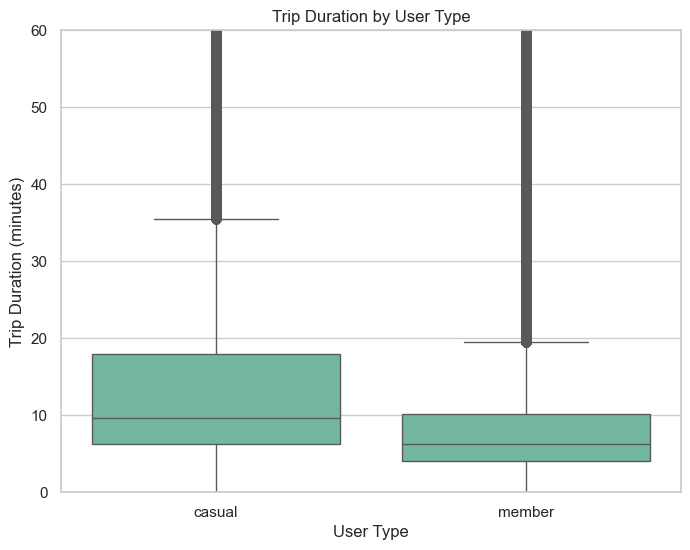

In [26]:
# Second attempt of box plot :
plt.figure(figsize=(8,6))
sns.boxplot(data=df_2022, x="member_casual", y="trip_duration")
plt.ylim(0, 60)  # cap at 60 mins to reduce outlier skew, optional
plt.title("Trip Duration by User Type")
plt.xlabel("User Type")
plt.ylabel("Trip Duration (minutes)")
plt.show()

In [34]:
#Interpretation :
# The box plot shows that casual riders generally have longer trip durations compared to members, 
# whose trips are shorter and more consistent. 
# The median line inside each box highlights the typical ride length, 
# while the spread (IQR) indicates variability.
#  Numerous outliers suggest that some users, especially casual ones, 
# take very long rides, likely for leisure. 
# Members, by contrast, are more likely using the service for short, routine commutes and maybe for work.


In [32]:
# Counting Outliers
# Function to find outliers
def find_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers


In [33]:
# Checking outliers for each user type
for user_type in df_2022['member_casual'].unique():
    subset = df_2022[df_2022['member_casual'] == user_type]
    outliers = find_outliers(subset, 'trip_duration')
    print(f"{user_type} - Outliers count: {len(outliers)}")
    print(f"Example outlier durations:\n{outliers['trip_duration'].head()}\n")

casual - Outliers count: 32731
Example outlier durations:
end_lat
40.736982    56.550000
40.736982    55.283333
40.718355    81.966667
40.718355    82.666667
40.712419    45.000000
Name: trip_duration, dtype: float64

member - Outliers count: 48980
Example outlier durations:
end_lat
40.736982    33.800000
40.736982    33.783333
40.719586    40.283333
40.718355    20.650000
40.718355    31.350000
Name: trip_duration, dtype: float64



In [ ]:
#	Casual users: 32,731 trips are considered outliers, these are unusually long rides, with some exceeding 80 minutes. 
#   This makes sense because casual riders often use bikes for leisure.
#	Members: 48,980 trips are outliers, these are mostly shorter than casual outliers but still above the normal range (e.g., 20–40 minutes),
#   likely longer commutes or occasional extended rides.

#   This confirms what we saw in the box plot: casual riders have more extreme long trips,
#   while members have fewer extreme trips and generally shorter durations.

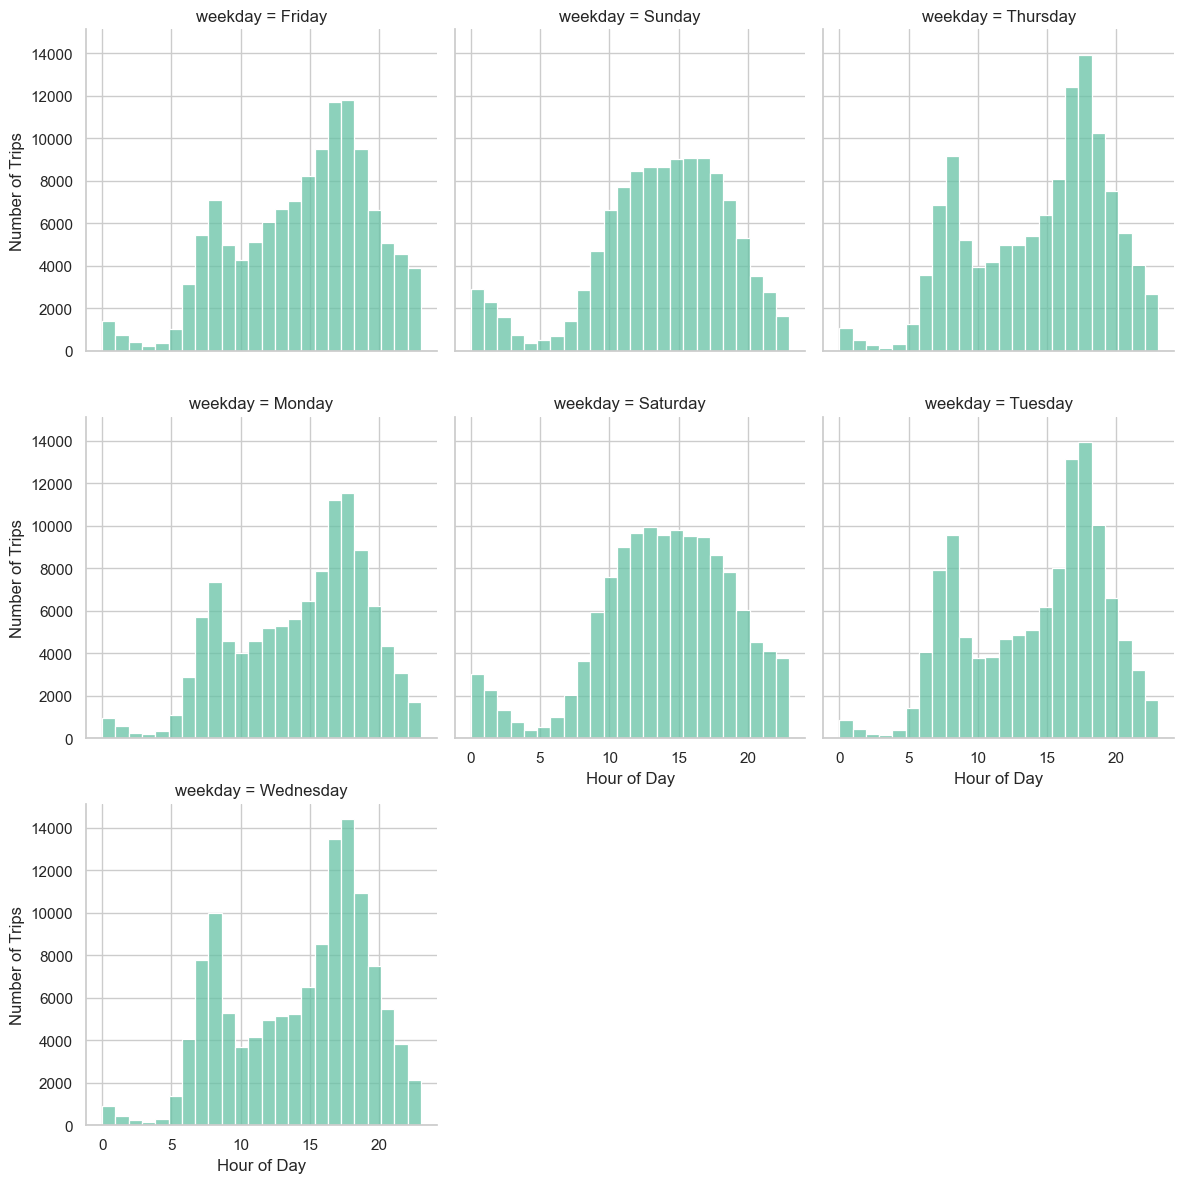

In [27]:
# Step 7. FacetGrit plot that makes sense for the analysis questions in the project
g = sns.FacetGrid(df_2022, col="weekday", col_wrap=3, height=4)
g.map(sns.histplot, "hour", bins=24)
g.set_axis_labels("Hour of Day", "Number of Trips")
plt.show()

In [ ]:
#Interpretation:
# Weekday plots show strong peaks in the morning and evening, 
# reflecting commuting behavior. 
# Weekend plots, however, display flatter patterns with more activity during midday and afternoon, 
# suggesting recreational use. 
# This contrast highlights different user behaviors between workdays and leisure days.

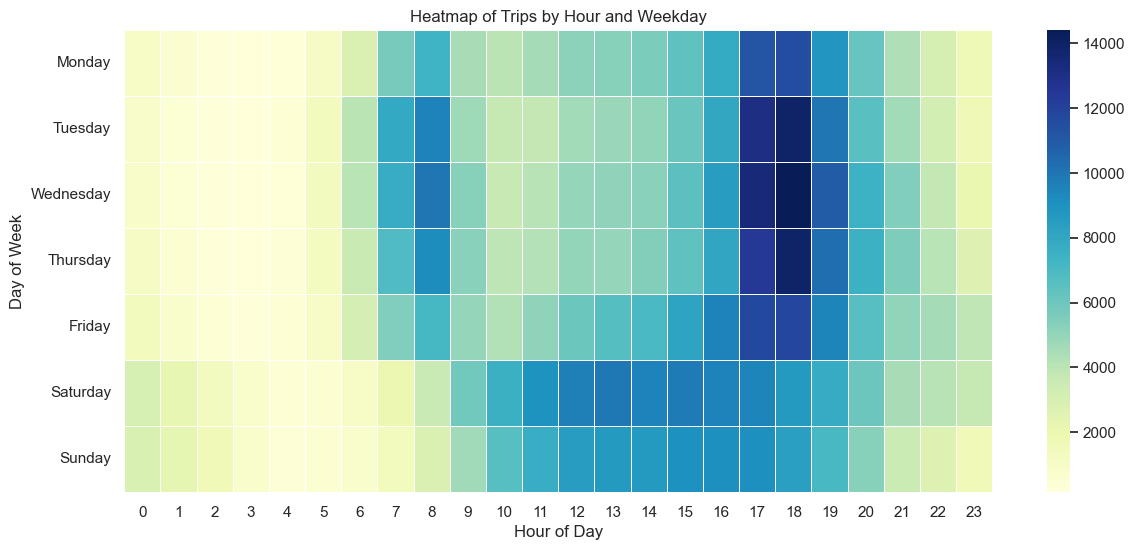

In [28]:
# Extra trying hourly heat tree map for week days vs weekends
# aggregate trips by weekday and hour
hourly = df_2022.groupby(['weekday', 'hour']).size().reset_index(name='trip_count')

# make weekdays ordered (so they don’t appear scrambled)
weekday_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
hourly['weekday'] = pd.Categorical(hourly['weekday'], categories=weekday_order, ordered=True)

# pivot table for heatmap
heatmap_data = hourly.pivot(index="weekday", columns="hour", values="trip_count")

# plot
plt.figure(figsize=(14,6))
sns.heatmap(heatmap_data, cmap="YlGnBu", linewidths=.5)
plt.title("Heatmap of Trips by Hour and Weekday")
plt.xlabel("Hour of Day")
plt.ylabel("Day of Week")
plt.show()

In [ ]:
#Darker cells = more trips.
#You should see commuting peaks (Mon–Fri around 7–9 am and 5–7 pm).
#Weekend cells should glow more around midday/afternoon, reflecting recreational use.

In [ ]:
#Resume of What I have as viz
#Bar chart (top 20 stations)
#Dual-axis line plot (trips vs temperature)
#Box plot (trip duration by user type)
#FacetGrid (hourly trips per weekday)
#Heatmap (hour × weekday patterns)

In [29]:
# Inspecting Date Ranges of the full merged data set
# Trips date range
print("Trips date range:")
print("  Earliest trip:", df['started_at'].min())
print("  Latest trip:  ", df['started_at'].max())

# Weather date range
print("\nWeather date range:")
print("  Earliest weather record:", df['date'].min())
print("  Latest weather record:  ", df['date'].max())

Trips date range:
  Earliest trip: 2021-07-01 00:00:21
  Latest trip:   2022-11-30 23:57:41

Weather date range:
  Earliest weather record: 2021-07-01 00:00:00
  Latest weather record:   2022-11-30 00:00:00


In [ ]:
#Trips: 2021-07-01 → 2022-11-30
#Weather: 2021-07-01 → 2022-11-30
#Dataset contains partial 2021 data and almost a full 2022, but it stops at November 30, 2022.

In [30]:
# Inspecting Data Ranges of the full data frame of 2022
# Filter 2022 only
df_2022 = df[df['started_at'].dt.year == 2022].copy()

print("Trips in 2022:")
print("  Earliest:", df_2022['started_at'].min())
print("  Latest:  ", df_2022['started_at'].max())

print("\nWeather in 2022:")
print("  Earliest:", df_2022['date'].min())
print("  Latest:  ", df_2022['date'].max())

Trips in 2022:
  Earliest: 2022-01-01 00:10:20
  Latest:   2022-11-30 23:57:41

Weather in 2022:
  Earliest: 2022-01-01 00:00:00
  Latest:   2022-11-30 00:00:00


In [ ]:
#Trips: 2022-01-01 → 2022-11-30
#Weather: 2022-01-01 → 2022-11-30
# Stops at November 30